# Logistic regression binary classification

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('titanic_train.csv', usecols=['Survived','PassengerId','Pclass'])

In [13]:
df.head()

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3
3,4,1,1
4,5,0,3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
dtypes: int64(3)
memory usage: 21.0 KB


In [16]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='Survived'),df['Survived'],test_size=0.3,random_state=0)

In [17]:
# loading logistic regression
from sklearn.linear_model import LogisticRegression

regr=LogisticRegression()
regr.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred=regr.predict(X_test)

In [19]:
regr.score(X_test,y_test)

0.6940298507462687

In [35]:
# metrics

from sklearn.metrics import accuracy_score, classification_report,fbeta_score,confusion_matrix,roc_curve

In [24]:
# classification report

classification=classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.71      0.88      0.78       168
           1       0.65      0.39      0.49       100

    accuracy                           0.69       268
   macro avg       0.68      0.63      0.63       268
weighted avg       0.69      0.69      0.67       268



In [27]:
# accuracy score

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.6940298507462687


In [29]:
#f1 score

fbeta=fbeta_score(y_test,y_pred,beta=1)
print(fbeta)

0.4875


In [31]:
#f0.5 score

fbeta=fbeta_score(y_test,y_pred,beta=0.5)
print(fbeta)

0.573529411764706


In [32]:
#f2 score

fbeta=fbeta_score(y_test,y_pred,beta=2)
print(fbeta)

0.42391304347826086


In [34]:
#confusion matrix

matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[147  21]
 [ 61  39]]


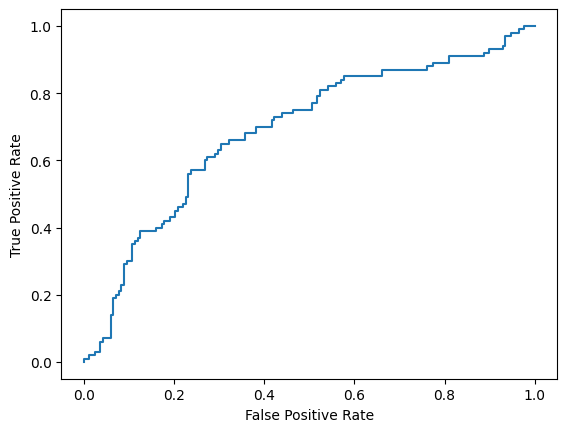

In [42]:
# roc curve

y_pred_proba = regr.predict_proba(X_test)[::,1]
x,y,_=roc_curve(y_test,y_pred_proba)
plt.plot(x,y)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
